## Linear Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures # "Feature Engineering" for Polynomial Regression x --> x, x^2, x^3, x^4, ....
from sklearn.metrics import mean_squared_error

In [3]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [4]:
# Create some data
np.random.seed(42)
N = 10
X_train = 3.0*np.random.rand(N, 1) # rand(N,1): Create N random numbers in the interval [0,1]
y_train = 1.0 + 0.5*X_train + np.random.randn(N,1)/2.0  # randn(N,1): Create N random numbers ~ standard normal distribution Gaussian(0,1)

N_test = 10
X_test = 3.0*np.random.rand(N_test, 1)
y_test = 1.0 + 0.5*X_test + np.random.randn(N_test,1)/2.0

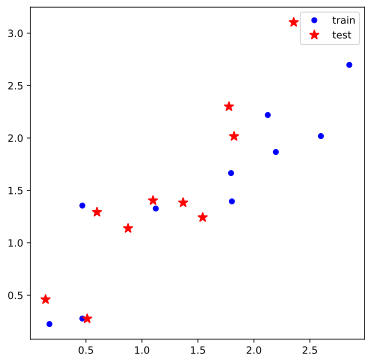

In [5]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train, 'b.', markersize=10, label='train')
plt.plot(X_test, y_test, 'r*', markersize=10, label='test')
plt.legend()
plt.show()

In [6]:
# Create some data to use for plotting
X_new = np.linspace(0,3,100).reshape(100,1) # Create an array of 100 equal-spaced numbers from 0->3

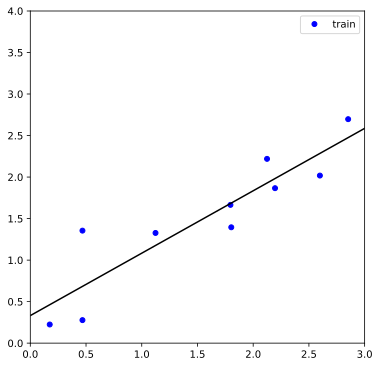

[0.33181066] [[0.75155622]]


In [7]:
lin_reg = LinearRegression() # MLE
lin_reg.fit(X_train,y_train)

plt.figure(figsize=(6,6))
plt.plot(X_train,y_train,'b.', ms=10, label='train')
plt.plot(X_new, lin_reg.predict(X_new), 'k-')
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()
print(lin_reg.intercept_, lin_reg.coef_)  # intercept_: w0 (sometimes we call it b) .coef_ : w1, w2, w3,....
# Here we only have a simple linear regression model: predict = w0 + w1*x


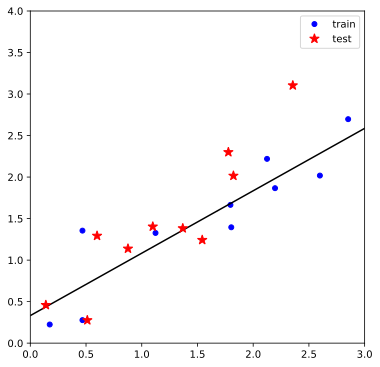

Training Loss:  0.09991531905633781
Testing Loss:  0.21020128681013045


In [16]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10, label='train')
plt.plot(X_new, lin_reg.predict(X_new), 'k-')
plt.plot(X_test, y_test, 'r*', ms=10, label='test')
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()
lr_loss = mean_squared_error(y_train, lin_reg.predict(X_train))
print('Training Loss: ', lr_loss)
lr_loss = mean_squared_error(y_test, lin_reg.predict(X_test))
print('Testing Loss: ', lr_loss)

## Polynomial Regression

$\texttt{prediction} = w_0 + w_1x + w_2x^2 + w_3x^3 + \ldots + w_Dx^D$

[-0.0916451] [[ 2.35120734 -1.23811156  0.26177074]]


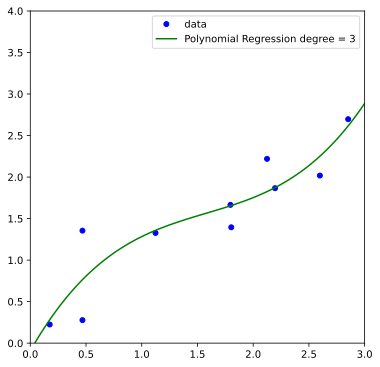

Training Loss:  0.08750190066671262


In [18]:
deg = 3
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x --> x, x^2, x^3
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3

poly_reg = LinearRegression()  # In essence, Polynomial Regression is still Linear Regression, but we use polynomial features x, x^2, x^3, ....
poly_reg.fit(X_poly,y_train) 

plt.figure(figsize=(6,6))
plt.plot(X_train, y_train, 'b.', ms=10, label='data')
# plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
# print(lin_reg.intercept_, lin_reg.coef_) 

plt.plot(X_new, poly_reg.predict(X_new_poly), 'g', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_) 
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()
poly_loss = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', poly_loss)

[-0.0916451] [[ 2.35120734 -1.23811156  0.26177074]]


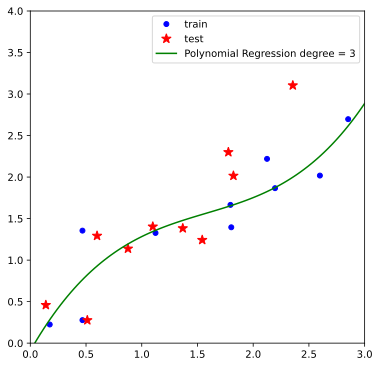

Training Loss:  0.08750190066671262
Testing Loss:  0.23747048298743462


In [19]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10, label='train')
plt.plot(X_test,y_test,'r*', ms=10, label='test')
# plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
# print(lin_reg.intercept_, lin_reg.coef_) 

plt.plot(X_new, poly_reg.predict(X_new_poly), 'g', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_) 
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()

poly_loss = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', poly_loss)
X_test_poly = poly.fit_transform(X_test)
poly_loss = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
print('Testing Loss: ', poly_loss)

[38.06987099] [[ -399.60873879  1364.69579439 -2093.21939461  1665.8204774
   -716.24860899   158.03695706   -14.0390417 ]]


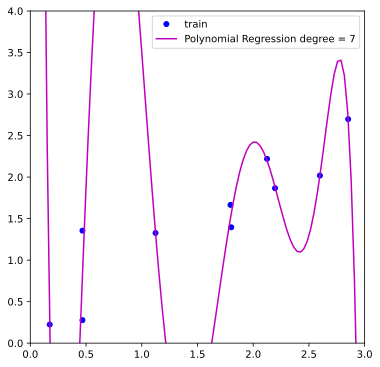

Training Loss:  0.06322418953669937


In [20]:
deg = 7
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x --> x, x^2, x^3
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3

poly_reg = LinearRegression()  # In essence, Polynomial Regression is still Linear Regression, but we use polynomial features x, x^2, x^3, ....
poly_reg.fit(X_poly,y_train) 

plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10, label='train')
# plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
# print(lin_reg.intercept_, lin_reg.coef_) 

plt.plot(X_new, poly_reg.predict(X_new_poly), 'm', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_) 
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()
poly_loss = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', poly_loss)

[38.06987099] [[ -399.60873879  1364.69579439 -2093.21939461  1665.8204774
   -716.24860899   158.03695706   -14.0390417 ]]


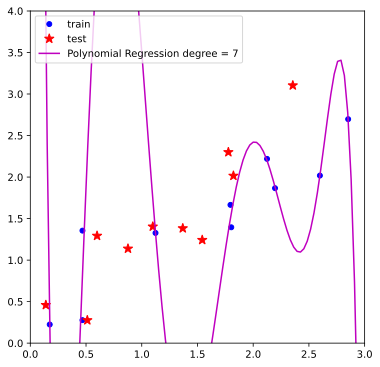

Training Loss:  0.06322418953669937
Testing Loss:  5.957556905580832


In [21]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10, label='train')
plt.plot(X_test,y_test,'r*', ms=10, label='test')
# plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
# print(lin_reg.intercept_, lin_reg.coef_) 

plt.plot(X_new, poly_reg.predict(X_new_poly), 'm', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_) 
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()

poly_loss = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', poly_loss)
X_test_poly = poly.fit_transform(X_test)
poly_loss = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
print('Testing Loss: ', poly_loss)

---Simple Linear Regression---
[0.33181066] [[0.75155622]]
Testing Loss:  0.21020128681013045
---Polynomial Regression degree = 3---
[-0.0916451] [[ 2.35120734 -1.23811156  0.26177074]]
Testing Loss:  0.23747048298743462
---Polynomial Regression degree = 3---
[38.06987099] [[ -399.60873879  1364.69579439 -2093.21939461  1665.8204774
   -716.24860899   158.03695706   -14.0390417 ]]
Testing Loss:  5.957556905580832


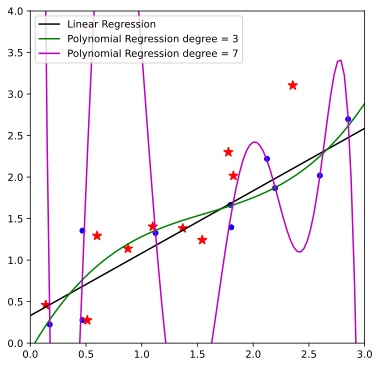

In [22]:
deg = 3
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x --> x, x^2, x^3
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3

poly_reg = LinearRegression()  # In essence, Polynomial Regression is still Linear Regression, but we use polynomial features x, x^2, x^3, ....
poly_reg.fit(X_poly,y_train) 

plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10)
plt.plot(X_test, y_test,'r*', ms=10)
plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
print('---Simple Linear Regression---')
print(lin_reg.intercept_, lin_reg.coef_) 
lr_loss = mean_squared_error(y_test, lin_reg.predict(X_test))
print('Testing Loss: ', lr_loss)

print(f'---Polynomial Regression degree = {deg}---')
plt.plot(X_new, poly_reg.predict(X_new_poly), 'g', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_) 
X_test_poly = poly.fit_transform(X_test)
poly_3_loss = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
print('Testing Loss: ', poly_3_loss)


print(f'---Polynomial Regression degree = {deg}---')
deg = 7
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x --> x, x^2, x^3, ..., x^7
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3, ... x^7

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
plt.plot(X_new, poly_reg.predict(X_new_poly), 'm', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_) 

X_test_poly = poly.fit_transform(X_test)
poly_7_loss = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
print('Testing Loss: ', poly_7_loss)

plt.axis([0, 3, 0, 4])
plt.legend()
plt.show()

The 7-th degree polynomial regression model above (magenta color) is overfit to our training dataset.
If we use an overfit model on our future data, it will have a lot of errors.

The magnitude of parameters of an overfit model would be very big (very far from 0.0).

## Ridge Regression

Ridge Regression: Weight Decay/Maximum A Posteriori Estimation (MAP) for Linear Regression

$\texttt{prediction} = w_0 + w_1x + w_2x^2 + \ldots + w_Dx^D$ (However $w_1, w_2,\ldots, w_D$ will have small values close to 0.0).

$w_{map} = \arg\min_{w} NLL(w) + \lambda\Vert w\Vert^2_2$


$\lambda\Vert w\Vert^2_2$: Regularziation term, and $\lambda$ is the regularization strength.

[0.33181066] [[0.75155622]]
[38.06334137] [[ -399.54006341  1364.46223527 -2092.86030384  1665.5333641
   -716.12443355   158.00938027   -14.03657526]]
[0.07988] [[-0.09370934  6.14945024 -4.77478425 -3.78021807  5.75140446 -2.28394655
   0.29814782]]
[0.96643294] [[ 0.00141423  0.00266913  0.00442294  0.00683627  0.00931761  0.00896911
  -0.00359498]]
[1.50446301] [[6.07278017e-10 1.77351966e-09 4.72471362e-09 1.25448975e-08
  3.35844395e-08 9.07463757e-08 2.47260904e-07]]


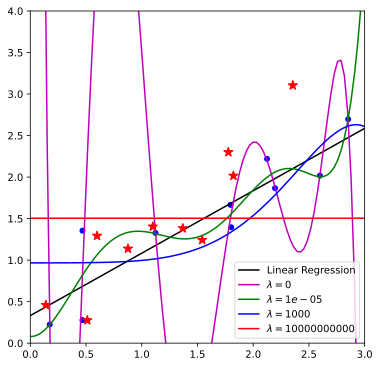

In [23]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10)
plt.axis([0, 3, 0, 4])

deg = 7
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x ---> x, x^2, x^3, ..., x^7
X_new_poly = poly.fit_transform(X_new)

plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
print(lin_reg.intercept_, lin_reg.coef_) 

lambd = 0
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y_train)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'm-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

lambd = 10**-5  # 10^{-5}
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y_train)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'g-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

lambd = 1000
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y_train)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'b-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

lambd = 10000000000  # Choose it by our experience, trial and error
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y_train)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'r-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

plt.plot(X_test, y_test,'r*', ms=10)
plt.legend()
plt.show()